In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import movie_reviews, stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [5]:
nltk.download('movie_reviews')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/vismaya/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vismaya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/vismaya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
documents = [(movie_reviews.raw(fileid), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]


In [9]:
import random
random.shuffle(documents)

texts = [text for text, label in documents]
labels = [1 if label == 'pos' else 0 for text, label in documents]

df = pd.DataFrame({'review': texts, 'label': labels})
print(df.head())

                                              review  label
0   " marie couldn't talk , " paulie , the parrot...      0
1  as with his other stateside releases , jackie ...      1
2  writers : dennis feldman and jonathan hensleig...      0
3  apocalypse now , based on the novel " hearts o...      1
4  in 1995 , brian singer and christopher mcquarr...      1


In [15]:
stop_words = set(stopwords.words('english'))

def preprocess(text):
    tokens = word_tokenize(text.lower())                # Tokenization
    tokens = [t for t in tokens if t.isalpha()]          # Remove punctuation/numbers
    tokens = [t for t in tokens if t not in stop_words]  # Remove stopwords
    return " ".join(tokens)

df['clean_review'] = df['review'].apply(preprocess)
print(df['clean_review'].head())

0    marie could talk paulie parrot star movie tell...
1    stateside releases jackie chan latest chopsock...
2    writers dennis feldman jonathan hensleigh base...
3    apocalypse based novel hearts darkness extreme...
4    brian singer christopher mcquarrie dreamed sim...
Name: clean_review, dtype: object


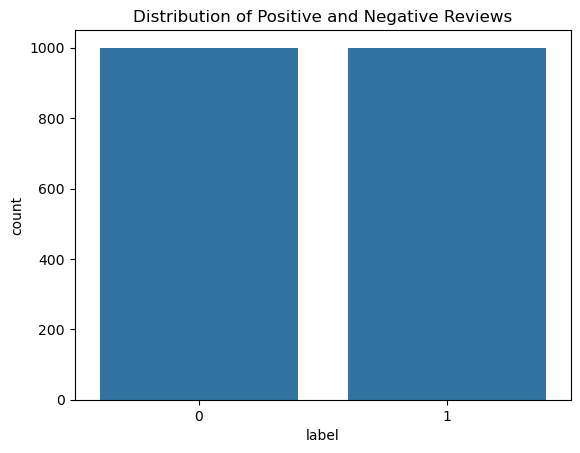

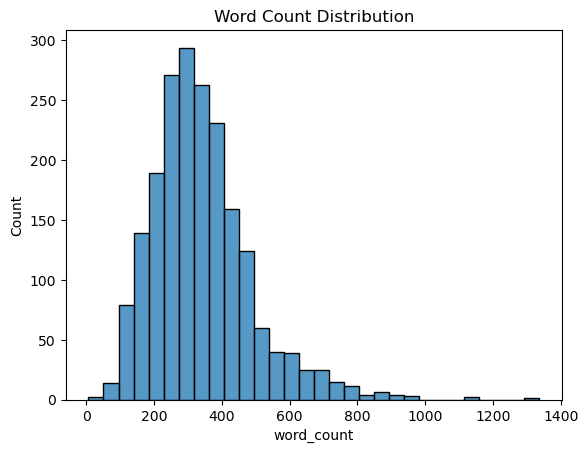

In [17]:
sns.countplot(x=df['label'])
plt.title("Distribution of Positive and Negative Reviews")
plt.show()

# Word count distribution
df['word_count'] = df['clean_review'].apply(lambda x: len(x.split()))
sns.histplot(df['word_count'], bins=30)
plt.title("Word Count Distribution")
plt.show()


In [19]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_review'])
y = df['label']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

Accuracy: 0.84

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.82      0.84       200
           1       0.83      0.85      0.84       200

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400



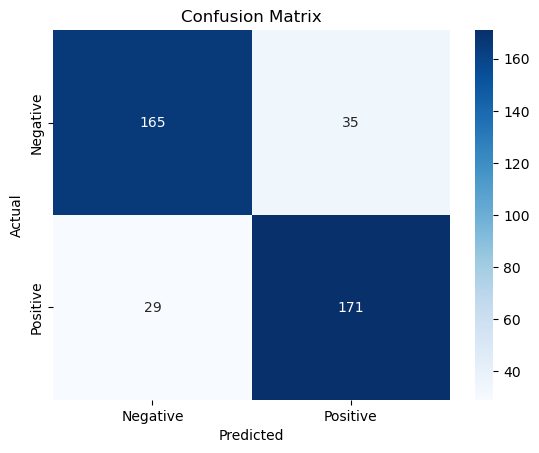

In [25]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()